In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyowm
import json

In [2]:
owm = pyowm.OWM('c93dea5aa8b325c9c6acd4728627cd62')

In [3]:
obs = owm.weather_at_coords(45.9748324693, 15.0914351743)
obs

<pyowm.webapi25.observation.Observation - reception time=2018-10-01 14:34:32+00>

In [4]:
print(obs.get_weather())

<pyowm.webapi25.weather.Weather - reference time=2018-10-01 14:00:00+00, status=rain, detailed status=light rain>


In [5]:
lj_center = 46.053310, 14.504023

In [6]:
with open('./data/cultural.json') as f:
    cultural = json.load(f)
    
for entry in cultural:
    # Properly name latitude and longitude
    entry['latitude'] = entry.pop('WGS.X')
    entry['longitude'] = entry.pop('WGS.Y')
    
    # Remove other xy coords since we don't know what they are
    del entry['X'], entry['Y']
    
    # Consistent naming of attributes
    name = entry.pop('Ime')
    if '- ' in name:
        name = name.split('- ')[1]
    entry['name'] = name
    
    entry['description'] = entry.pop('Opis')
    entry['keywords'] = entry.pop('Gesla')
    entry['type'] = entry.pop('Tip')
    entry['region'] = entry.pop('Obcina')
    
cultural[:3]

[{'ESD': 29884,
  'Zvrst': 'stavbe',
  'Datacija': 'zadnja četrtina 18. stol., 19. stol., prva polovica 20. stol., prva četrtina 21. stol., 2012',
  'LokacijaOp': 'Muzej na prostem je urejen na južnem obrobju Šentruperta na Dolenjskem.',
  'Podrocja': 'etnologija, krajinska arhitektura, tehniška zgodovina',
  'Zavod': 'ZVKD Novo mesto',
  'Varstvo': 'spomenik lokalnega pomena',
  'latitude': 45.9748324693,
  'longitude': 15.0914351743,
  'name': 'Muzej na prostem',
  'description': 'Muzej na prostem sestavljajo skupina 17 kozolcev različnih tipov in dve enostavni sušilni napravi (belokranjska ostrv in ribniški kozouček). Postavitev iz 2012 prikazuje genezo kozolca na Slovenskem in raznolikost kozolcev v Mirnski dolini.',
  'keywords': 'muzej na prostem, kozolec na psa, kozolec s plaščem, enojni kozolec, nizki kozolec, toplar, vzporedni kozolec',
  'type': 'profana stavbna dediščina',
  'region': 'ŠENTRUPERT'},
 {'ESD': 6118,
  'Zvrst': 'stavbe',
  'Datacija': 'prva polovica 16. stol., 

In [7]:
with open('./data/museums.json') as f:
    museums = json.load(f)
    
for entry in museums:
    # Properly name latitude and longitude
    entry['latitude'] = entry.pop('gps_lat')
    entry['longitude'] = entry.pop('gps_long')
    
    # Consistent naming of attributes
    entry['name'] = entry.pop('Ime javnega zavoda')
    entry['address'] = entry.pop('Naslov', '')
    entry['city'] = entry.pop('X6', '')
    entry['postal_code'] = entry.pop('X5', '')
    
    # Remove unneeded attributes
    del entry['X1']
    entry.pop('X2', None)
    entry.pop('Status', None)
    
    entry['type'] = 'museum'
    entry['region'] = entry['city'].upper()
    
museums[:3]

[{'latitude': 46.05208205,
  'longitude': 14.4995157278,
  'name': 'Narodni muzej Slovenije',
  'address': 'Prešernova cesta 20',
  'city': 'LJUBLJANA',
  'postal_code': 1000,
  'type': 'museum',
  'region': 'LJUBLJANA'},
 {'latitude': 46.05208205,
  'longitude': 14.4995157278,
  'name': 'Prirodoslovni muzej Slovenije',
  'address': 'Prešernova cesta 20',
  'city': 'LJUBLJANA',
  'postal_code': 1000,
  'type': 'museum',
  'region': 'LJUBLJANA'},
 {'latitude': 46.0643354,
  'longitude': 14.5369116,
  'name': 'Slovenski etnografski muzej',
  'address': 'Metelkova 2',
  'city': 'LJUBLJANA',
  'postal_code': 1000,
  'type': 'museum',
  'region': 'LJUBLJANA'}]

In [8]:
df_culture = pd.DataFrame.from_dict(cultural)

In [9]:
df_culture.region.value_counts()

LJUBLJANA                       341
NOVO MESTO                       54
MARIBOR                          50
SEŽANA                           47
RADOVLJICA                       45
TOLMIN                           44
KOPER                            42
POSTOJNA                         38
IDRIJA                           36
KOBARID                          34
BREŽICE                          33
KRANJ                            32
DIVAČA                           32
NOVA GORICA                      31
VIPAVA                           28
PIRAN                            28
ŠKOFJA LOKA                      27
ČRNOMELJ                         24
KAMNIK                           24
AJDOVŠČINA                       24
CELJE                            22
KOMEN                            22
KRŠKO                            22
PIVKA                            21
BOHINJ                           21
ILIRSKA BISTRICA                 20
BRDA                             20
SLOVENSKA BISTRICA          

In [10]:
df_museums = pd.DataFrame.from_dict(museums)

In [11]:
df_museums.region.value_counts()

LJUBLJANA               13
MARIBOR                  4
CELJE                    2
VELENJE                  2
MURSKA SOBOTA            2
SLOVENJ GRADEC           2
KRANJ                    2
PIRAN                    2
PTUJ                     1
TOLMIN                   1
IDRIJA                   1
RIBNICA                  1
KAMNIK                   1
KOČEVJE                  1
KOBARID                  1
METLIKA                  1
NOVA GORICA              1
JESENICE                 1
KOPER                    1
TRŽIČ                    1
ROGATEC                  1
KOSTANJEVICA NA KRKI     1
BREŽICE                  1
ŠKOFJA LOKA              1
TRBOVLJE                 1
IVANČNA GORICA           1
KRŠKO                    1
LENDAVA-LENDAVA          1
NOVO MESTO               1
AJDOVŠČINA               1
RADOVLJICA               1
POSTOJNA                 1
                         1
Name: region, dtype: int64

In [12]:
df_full = pd.concat([df_culture, df_museums], ignore_index=True, sort=False)
df_full.head()

,Avtorji,Datacija,ESD,LokacijaOp,Podrocja,Sinonimi,Varstvo,Zavod,Zvrst,description,keywords,latitude,longitude,name,region,type,address,city,postal_code
0,NaN,"zadnja četrtina 18. stol., 19. stol., prva pol...",29884.0,Muzej na prostem je urejen na južnem obrobju Š...,"etnologija, krajinska arhitektura, tehniška zg...",NaN,spomenik lokalnega pomena,ZVKD Novo mesto,stavbe,Muzej na prostem sestavljajo skupina 17 kozolc...,"muzej na prostem, kozolec na psa, kozolec s pl...",45.974832,15.091435,Muzej na prostem,ŠENTRUPERT,profana stavbna dediščina,NaN,NaN,NaN
1,Max Czeike (arhitekt; 1925),"prva polovica 16. stol., 17. stol., 19. stol.",6118.0,Koroška cesta 2. Hiša stoji na vogalu Koroške ...,umetnostna zgodovina,NaN,spomenik lokalnega pomena,ZVKD Maribor,stavbe,Nadstropna vogalna stavba poznosrednjeveške za...,"hiša, pivovarna",46.557815,15.644199,Hiša Koroška 2,MARIBOR,profana stavbna dediščina,NaN,NaN,NaN
2,NaN,"18. stol, 19. stol., druga polovica 20. stol.,...",29525.0,"Nježna hiša stoji na domačiji Jevšček 7, v vzh...",etnologija,NaN,spomenik lokalnega pomena,ZVKD Nova Gorica,stavbe,Vrhkletna oz. vrhhlevna kamnita hiša s štiride...,"vrhhlevna hiša, črna kuhinja",46.189711,13.578127,Nježna hiša,KOBARID,profana stavbna dediščina,NaN,NaN,NaN
3,NaN,"sredina 19. stol., 1830, 1870",23737.0,"Kopališka ulica 14, 16, 20, 22, 23. Dvorec sto...","umetnostna zgodovina, krajinska arhitektura",Strnišče,spomenik lokalnega pomena,ZVKD Maribor,stavbe s parki ali z vrtovi,Nadstropna stavba s tlorisom v L in slikovito ...,"dvorec, gospodarsko poslopje, drevored, marof",46.403391,15.789574,Dvorec Sternthal,KIDRIČEVO,profana stavbna dediščina,NaN,NaN,NaN
4,Zdenko Kalin (kipar; 1942),"druga četrtina 20. stol., 1942, 1946",20023.0,"Kip stoji v parku Tivoli, nad otroškim igriščem.",umetnostna zgodovina,Deček s piščalko,dediščina,ZVKD Ljubljana,spominski objekti in kraji,Bronast kip Pastirček ali Deček s piščalko del...,vrtna plastika,46.053135,14.494178,Bronast kip Pastirček,LJUBLJANA,profana stavbna dediščina,NaN,NaN,NaN


In [13]:
df_full.region.value_counts()

LJUBLJANA                       354
NOVO MESTO                       55
MARIBOR                          54
SEŽANA                           47
RADOVLJICA                       46
TOLMIN                           45
KOPER                            43
POSTOJNA                         39
IDRIJA                           37
KOBARID                          35
KRANJ                            34
BREŽICE                          34
NOVA GORICA                      32
DIVAČA                           32
PIRAN                            30
ŠKOFJA LOKA                      28
VIPAVA                           28
KAMNIK                           25
AJDOVŠČINA                       25
CELJE                            24
ČRNOMELJ                         24
KRŠKO                            23
KOMEN                            22
PIVKA                            21
BOHINJ                           21
ILIRSKA BISTRICA                 20
BRDA                             20
SLOVENSKA BISTRICA          

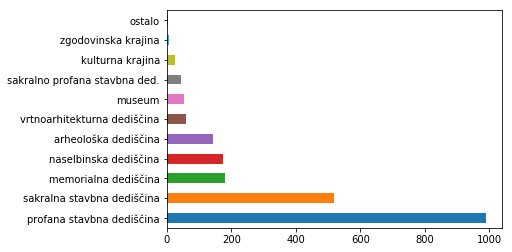

In [14]:
df_full.type.value_counts().plot.barh()

In [26]:
with open('./data/full.json', 'w') as f:
    df_full.to_json(f, force_ascii=False, orient='records')

## Bela krajina

https://en.wikipedia.org/wiki/White_Carniola

In [16]:
bela_krajina = df_full[df_full.region.isin(['METLIKA', 'ČRNOMELJ', 'SEMIČ'])]
len(bela_krajina)

53

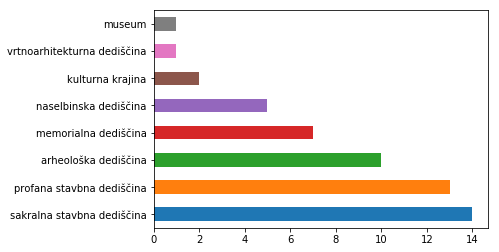

In [17]:
bela_krajina.type.value_counts().plot.barh()

## Brezje

https://skupnostobcin.si/podatki/zemljevid-obcin-tabela/#p2

In [18]:
brezje = df_full[df_full.region.isin(['RADOVLJICA', 'BLED', 'BOHINJ', 'NAKLO'])]
len(brezje)

87

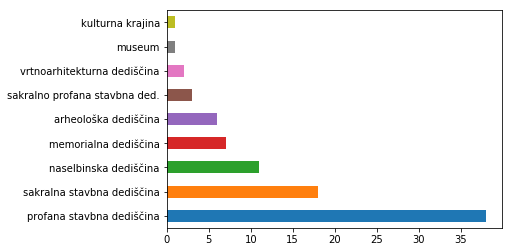

In [19]:
brezje.type.value_counts().plot.barh()

In [25]:
brezje[brezje.type.str.contains('vrtno')].name

1576     Park gradu Katzenstein
1604    Park gradu v Radovljici
Name: name, dtype: object